In [9]:
#
# Descarga de datos
#
import pandas as pd


owner = "jdvelasq"
repo = "datalabs"
file = "datasets/demanda_comercial.csv"

file_url = f"https://raw.githubusercontent.com/{owner}/{repo}/master/{file}"


data = pd.read_csv(file_url, sep=";", decimal=",", thousands=".")
data.head()



,Fecha,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2017-01-01,6090271.96,5887031.28,5708693.89,5538133.02,5389774.53,5288199.94,4851217.85,4876162.18,5073813.27,...,5745568.87,5647807.40,5609297.84,5690105.56,6761038.26,7077861.59,6979468.90,6695312.12,6289107.72,5794545.98
1,2017-01-02,5557603.42,5361012.17,5239119.86,5163721.70,5249539.75,5438852.95,5566947.57,6055220.80,6588005.66,...,7610559.73,7584026.97,7421194.49,7317194.26,8182697.67,8482127.69,8251009.75,7836278.95,7221234.85,6660691.64
2,2017-01-03,6160676.02,5924880.04,5764416.93,5685832.28,5778222.13,5985840.29,6083907.36,6545100.21,7092804.54,...,8148614.93,8117168.00,7930900.03,7783762.28,8653467.38,8835882.88,8562448.23,8095841.79,7443299.51,6840297.15
3,2017-01-04,6321851.20,6092135.24,5905390.85,5827867.82,5925730.02,6182279.89,6276759.96,6737660.53,7256819.19,...,8164513.51,8132006.92,7962749.39,7841533.59,8700506.07,8860255.66,8611085.76,8147451.75,7471240.82,6838250.32
4,2017-01-05,6395397.96,6162409.22,6001153.67,5918673.26,6005924.21,6225027.53,6322923.78,6739120.44,7307847.42,...,8144209.65,8136193.07,8022918.36,7927405.07,8718181.89,8832234.87,8579992.47,8063978.64,7406615.66,6829864.57


In [10]:
#
# Se organizan los datos para graficarlos.
#
data_to_plot = data.copy()
data_to_plot = data_to_plot.melt(
    id_vars=["Fecha"], var_name="hora", value_name="demanda"
)
data_to_plot = data_to_plot.sort_values(by=["Fecha", "hora"])
data_to_plot = data_to_plot.reset_index(drop=True)
data_to_plot = data_to_plot.head(500)
data_to_plot.head()


,Fecha,hora,demanda
0,2017-01-01,H01,6090271.96
1,2017-01-01,H02,5887031.28
2,2017-01-01,H03,5708693.89
3,2017-01-01,H04,5538133.02
4,2017-01-01,H05,5389774.53


In [11]:
#
# Crea una carpeta de salida
#
import os

if not os.path.exists("../files/plots"):
    os.makedirs("../files/plots")

if not os.path.exists("../files/data"):
    os.makedirs("../files/data")
    
    

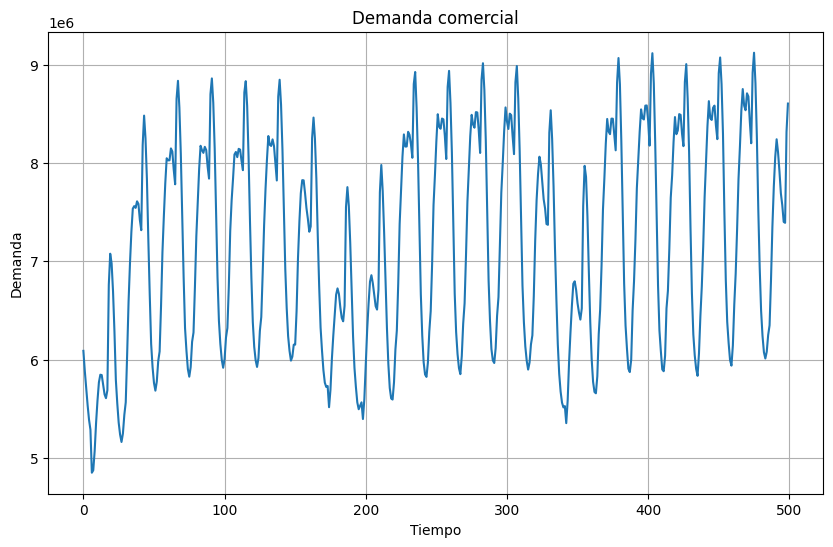

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_to_plot["demanda"])
plt.title("Demanda comercial")
plt.xlabel("Tiempo")
plt.ylabel("Demanda")
plt.grid()
plt.savefig("../files/plots/demanda-comercial.png")
plt.show()

In [13]:
#
# Preparación de la data
#
data = data.dropna()
data = data.drop_duplicates()
data = data.set_index("Fecha")


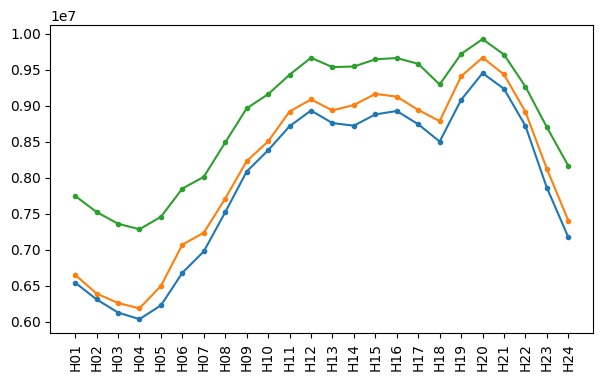

In [14]:
# Patrones de ejemplo
#
plt.figure(figsize=(7, 4))
plt.plot(data.loc["2017-06-05", :], ".-", color="tab:blue")
plt.plot(data.loc["2018-06-05", :], ".-", color="tab:orange")
plt.plot(data.loc["2022-06-03", :], ".-", color="tab:green")
plt.xticks(rotation=90)
plt.show()

In [24]:
#
# Se divide cada fila por el máximo de la fila para
# hacer adimensionales los datos
#
data = data.apply(lambda row: row / row.max(), axis=1)
data.head(10)

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H17,H18,H19,H20,H21,H22,H23,H24,cluster,day
Fecha,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.143411,0.138625,0.134426,0.130410,0.126916,0.124524,0.114235,0.114822,0.119476,0.126208,...,0.132086,0.133988,0.159206,0.166667,0.164350,0.157659,0.148093,0.136448,0.000000,1.0
2017-01-02,0.655213,0.632036,0.617666,0.608777,0.618894,0.641213,0.656315,0.713880,0.776693,0.822799,...,0.874921,0.862660,0.964699,1.000000,0.972752,0.923858,0.851347,0.785262,0.000000,0.0
2017-01-03,0.697234,0.670548,0.652387,0.643493,0.653950,0.677447,0.688545,0.740741,0.802727,0.844419,...,0.897579,0.880926,0.979355,1.000000,0.969054,0.916246,0.842395,0.774150,1.000000,1.0
2017-01-04,0.356753,0.343790,0.333252,0.328877,0.334399,0.348877,0.354209,0.380218,0.409515,0.429372,...,0.449352,0.442512,0.490985,0.500000,0.485939,0.459775,0.421615,0.385895,0.500000,1.0
2017-01-05,0.241366,0.232573,0.226487,0.223374,0.226667,0.234936,0.238631,0.254338,0.275802,0.287576,...,0.302789,0.299185,0.329029,0.333333,0.323814,0.304339,0.279530,0.257763,0.333333,1.0
2017-01-06,0.180342,0.173265,0.169429,0.167480,0.170029,0.177872,0.181839,0.194478,0.208152,0.218559,...,0.225979,0.221056,0.245160,0.250000,0.242806,0.229920,0.212456,0.195596,0.250000,1.0
2017-01-07,0.154236,0.147499,0.143954,0.141593,0.142542,0.145425,0.145433,0.153504,0.166218,0.175009,...,0.172556,0.173831,0.195079,0.200000,0.194913,0.185451,0.171657,0.159486,0.000000,1.0
2017-01-08,0.135975,0.130984,0.126692,0.123944,0.123005,0.123209,0.118580,0.122407,0.129096,0.134217,...,0.137349,0.140747,0.162326,0.166667,0.162558,0.154488,0.144121,0.134085,0.000000,1.0
2017-01-09,0.741549,0.717449,0.697649,0.688828,0.693286,0.697630,0.676364,0.701891,0.747615,0.789990,...,0.815800,0.841162,0.965378,1.000000,0.966967,0.914443,0.851577,0.792191,0.000000,0.0


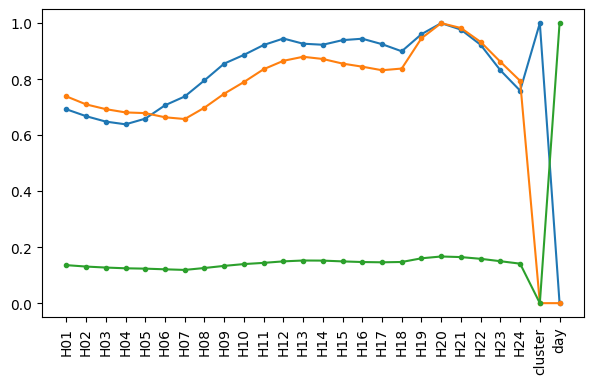

In [25]:
#
# Patrones de ejemplo
#
plt.figure(figsize=(7, 4))
plt.plot(data.loc["2017-06-05", :], ".-", color="tab:blue")
plt.plot(data.loc["2018-06-04", :], ".-", color="tab:orange")
plt.plot(data.loc["2022-06-05", :], ".-", color="tab:green")
plt.xticks(rotation=90)
plt.savefig("../files/plots/demanda-comercial-patrones-ejemplo.png")
plt.show()


In [16]:
import datetime


for date_str in ["2017-06-05", "2018-06-05", "2022-06-05"]:
    date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d")
    day_of_week = date_obj.strftime("%A")

    print(date_str, day_of_week)
    
    
    

2017-06-05 Monday
2018-06-05 Tuesday
2022-06-05 Sunday


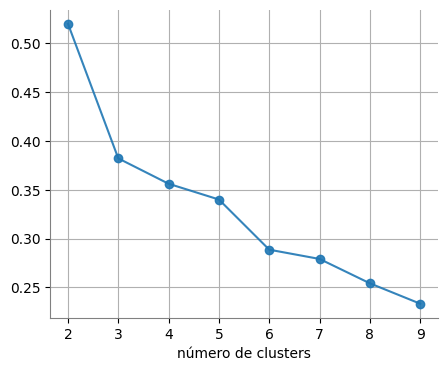

In [17]:
#
# Determinación de la cantidad de perfiles diferentes
#
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 10
scores = []

for n in range(2, n_clusters):

    kmeans = KMeans(n_clusters=n, n_init="auto")
    kmeans.fit(data)
    labels = kmeans.labels_
    scores.append(silhouette_score(data, labels, metric="euclidean"))


plt.figure(figsize=(5, 4))
plt.plot(range(2, n_clusters), scores, marker="o", color="tab:blue", alpha=0.9)
plt.xlabel("número de clusters")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.show()


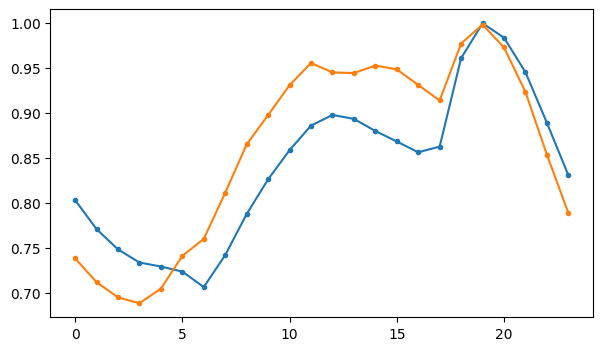

In [18]:
#
# Dos patrones óptimos
#
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(data)

plt.figure(figsize=(7, 4))
plt.plot(kmeans.cluster_centers_[0], ".-", color="tab:blue")
plt.plot(kmeans.cluster_centers_[1], ".-", color="tab:orange")
plt.savefig("../files/plots/demanda-comercial-perfiles.png")
plt.show()


In [19]:
#
# Adiciona el numero del cluster correspondiente a cada fila
# y agrega el día de la semana (como entero). El domingo
# es el día 0.
#
data = data.assign(cluster=kmeans.labels_)
data = data.assign(day=pd.to_datetime(data.index).day_of_week)
data[["cluster", "day"]]


,cluster,day
Fecha,,
2017-01-01,0,6
2017-01-02,0,0
2017-01-03,1,1
2017-01-04,1,2
2017-01-05,1,3
...,...,...
2022-08-27,1,5
2022-08-28,0,6
2022-08-29,1,0


In [20]:
#
# Calcula la frecuencia de cada día por cluster
#
data_per_cluster_0 = data.loc[data.cluster == 0, "day"]
days_cluster_0 = data_per_cluster_0.value_counts()
days_cluster_0 = days_cluster_0.sort_index()
days_cluster_0


day
0     67
1     13
2     12
3     11
4     17
5     28
6    296
Name: count, dtype: int64

In [21]:
data_per_cluster_1 = data.loc[data.cluster == 1, "day"]
days_cluster_1 = data_per_cluster_1.value_counts()
days_cluster_1 = days_cluster_1.sort_index()
days_cluster_1


day
0    229
1    283
2    284
3    284
4    278
5    267
Name: count, dtype: int64

In [22]:
#
# Salta el resultado
#
pd.DataFrame(
    {
        "days": list(range(7)),
        "cluster 0": days_cluster_0,
        "cluster 1": days_cluster_1,
    }
).to_csv("../files/data/demanda-comercial-dias.csv")
